In [1]:
runlist=[1361, 1364, 1365, 1366] # Select LED runs with bias set to 0x600, 0x680, 0x700 and 0x780
DATASET='rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy.signal import find_peaks
hep.style.use('ATLAS')  # or ATLAS/LHCb2

maxx=20

In [2]:
#list all the files in the dataset
#mu2einit
#muse setup ops
#samweb list-definition-files rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.root | mdh print-url -s root -

In [3]:
#Open a single file
file = uproot.open('root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/da/70/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001316_016.root')

In [4]:
file

<ReadOnlyDirectory '/' at 0x7f1a86564610>

In [5]:
file.keys()[0:10]

['run;1',
 'spills;1',
 'runSummary;1',
 'plots;1',
 'plots/PEs_0_0;1',
 'plots/PEsTempCorrected_0_0;1',
 'plots/PEs_0_1;1',
 'plots/PEsTempCorrected_0_1;1',
 'plots/PEs_0_2;1',
 'plots/PEsTempCorrected_0_2;1']

In [6]:
arr = file['run'].arrays()

In [7]:
arr.fields # Events, FEBs, SiPM id

['runNumber',
 'subrunNumber',
 'spillIndex',
 'spillNumber',
 'boardStatus',
 'FPGABlocks',
 'spillTimestamp',
 'eventNumber',
 'tdcSinceSpill',
 'timeSinceSpill',
 'fitStatus',
 'PEs',
 'PEsTemperatureCorrected',
 'temperature',
 'pulseHeight',
 'beta',
 'time',
 'LEtime',
 'recoStartBin',
 'recoEndBin',
 'pedestal',
 'fitStatusReflectedPulse',
 'PEsReflectedPulse',
 'PEsTemperatureCorrectedReflectedPulse',
 'pulseHeightReflectedPulse',
 'betaReflectedPulse',
 'timeReflectedPulse',
 'LEtimeReflectedPulse',
 'recoStartBinReflectedPulse',
 'recoEndBinReflectedPulse',
 'trackSlope',
 'trackIntercept',
 'trackChi2',
 'trackPoints',
 'trackPEs']

In [8]:
arr.eventNumber.to_numpy().shape

(101025,)

In [9]:
arr.PEs.to_numpy().shape

(101025, 2, 64)

In [10]:
arr.PEs[:,0,0].to_numpy().shape # Only first channel from first FEBs

(101025,)

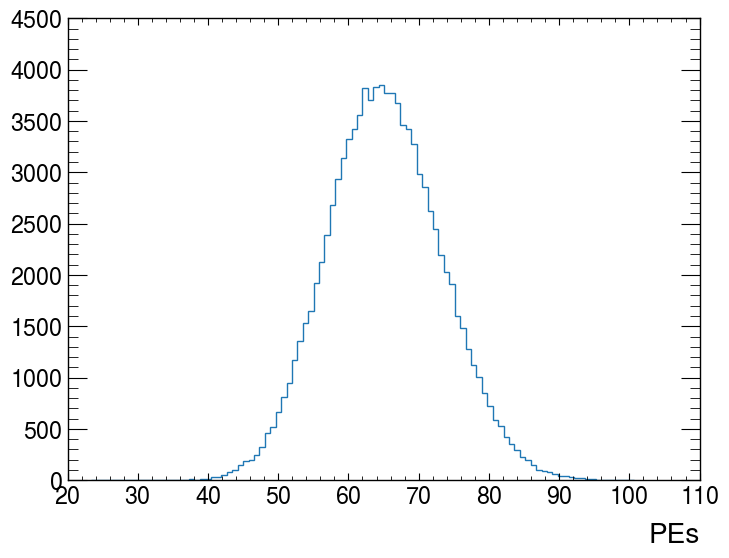

In [11]:
#Histogram first channel from first FEBs
plt.hist(arr.PEs[:,0,0], histtype='step', bins=100);
plt.xlabel('PEs');

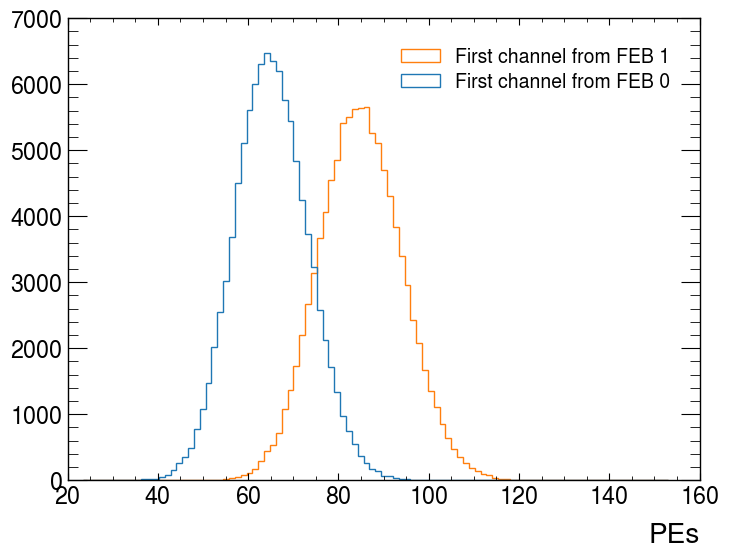

In [12]:
#Histogram first channel from both FEBs
plt.hist(arr.PEs[:,:,0], histtype='step', bins=100, label=['First channel from FEB 0', 'First channel from FEB 1']);
plt.xlabel('PEs');
plt.legend();

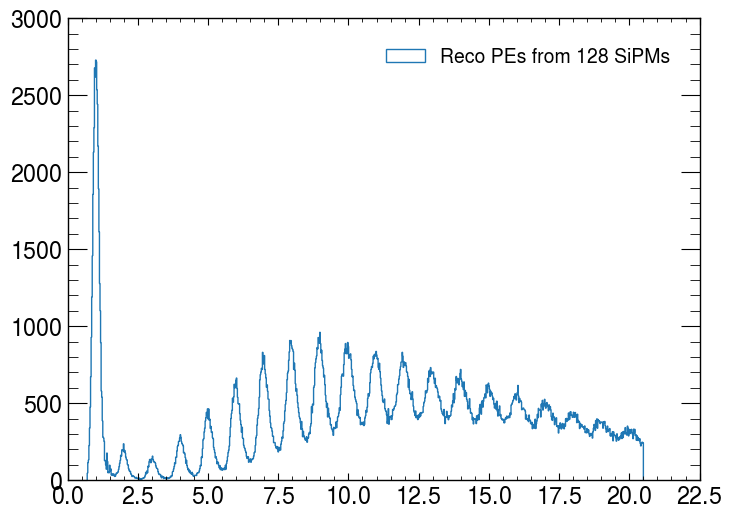

In [13]:
plt.hist(ak.flatten(ak.flatten(arr['PEs'])), histtype='step', bins=1000, range=(0.7, maxx+0.5), label="Reco PEs from 128 SiPMs"); #FEB0
plt.legend();

In [14]:
# Now scale it to multiple runs

In [15]:
processor = wideband.DataProcessor(runlist=runlist, userunlist=True, remove=False, fixtimes=False, treename='run', filter_name=["PEs"])
arr = processor.getData(DATASET) # get akward array for "run" tree

Processing file: rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001366_003.root - 100.0% complete

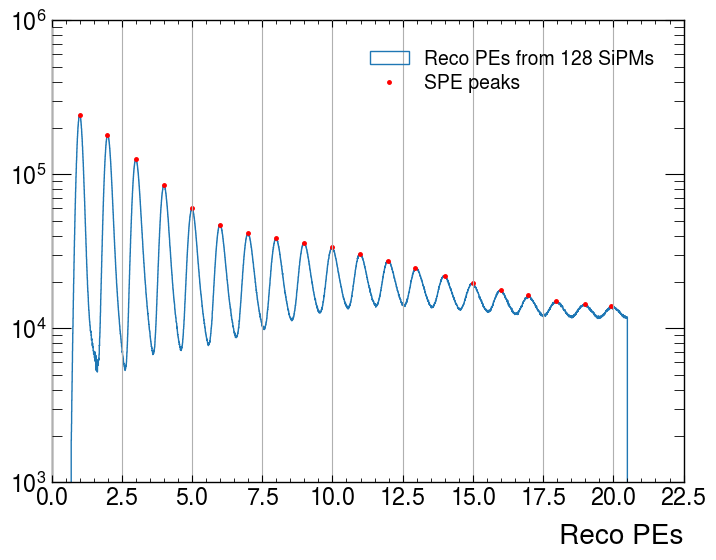

In [16]:
hist, bins, _ = plt.hist(ak.flatten(ak.flatten(arr['PEs'])), histtype='step', bins=4000, range=(0.7, maxx+0.5), label="Reco PEs from 128 SiPMs"); #FEB0
peaks, _ = find_peaks(hist, width=5)
plt.plot(bins[peaks], hist[peaks], "r.", markersize=5, label="SPE peaks")

plt.yscale('log')
plt.xlabel('Reco PEs')
plt.grid(axis='x')
plt.legend();

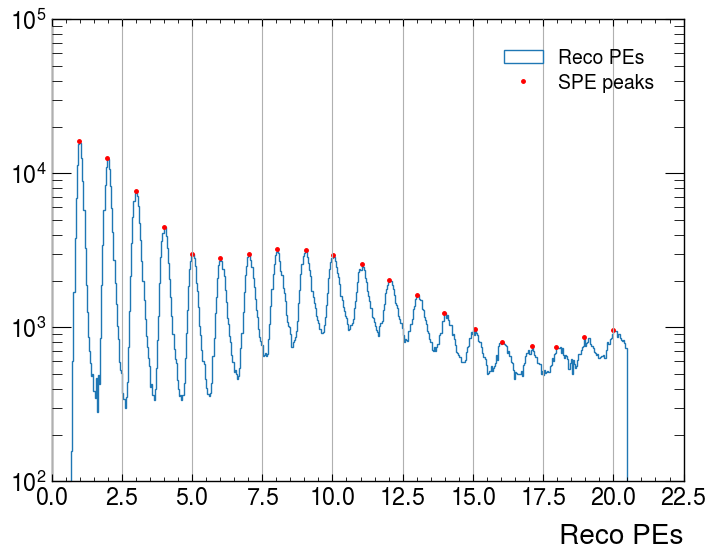

In [17]:
hist, bins, _ = plt.hist(arr['PEs'][:,0,1], histtype='step', bins=500, range=(0.7, maxx+0.5), label="Reco PEs"); #FEB0
peaks, _ = find_peaks(hist, width=5)
plt.plot(bins[peaks], hist[peaks], "r.", markersize=5, label="SPE peaks")

plt.yscale('log')
plt.xlabel('Reco PEs')
plt.grid(axis='x')
plt.legend();

Coefficients: [1.00074858 0.00303986]
Standard deviations of coefficients: [0.00148166 0.017749  ]


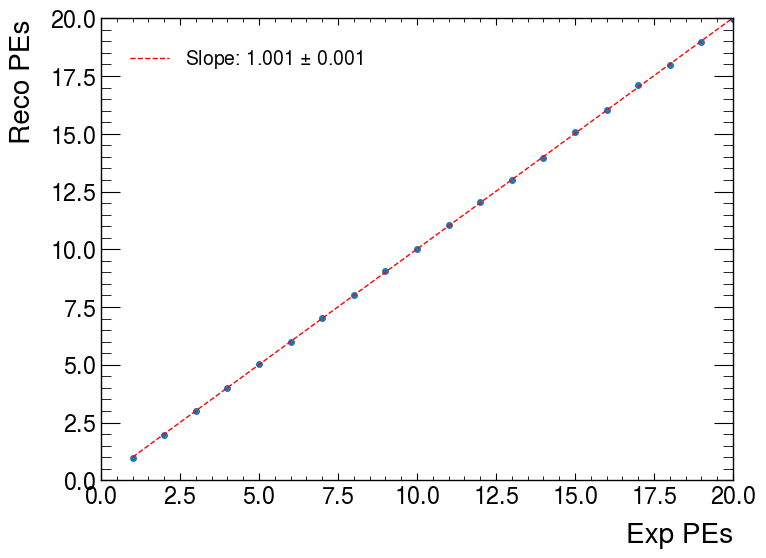

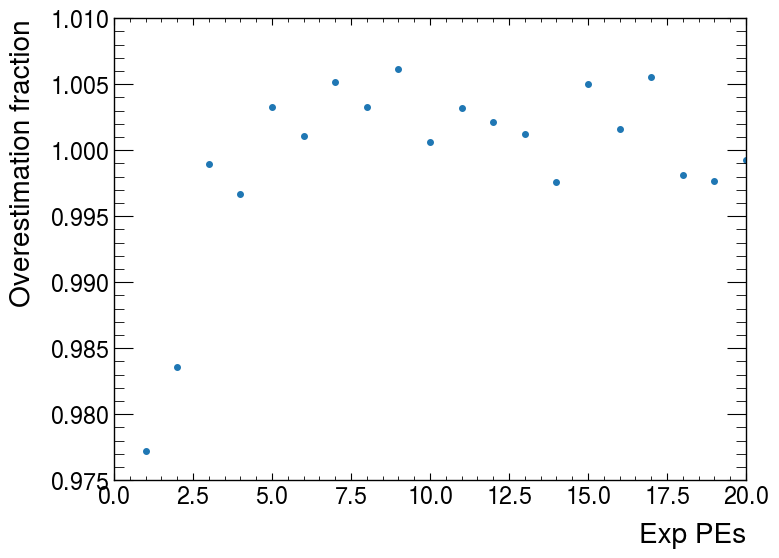

In [18]:
y=bins[peaks]
x=range(1,len(y)+1)
plt.plot(x, y, '.');
coeffs, cov_matrix = np.polyfit(x, y, deg=1, cov=True)

coeffs_std = np.sqrt(np.diag(cov_matrix))
print(f'Coefficients: {coeffs}')
print(f'Standard deviations of coefficients: {coeffs_std}')


line = coeffs[0] * x + coeffs[1]
b=np.float64(0)
plt.plot(x, line, '--r', linewidth=1, label=r'Slope: %0.3f $\pm$ %.3f'%(coeffs[0], coeffs_std[0]))
plt.xlabel("Exp PEs")
plt.ylabel("Reco PEs")
plt.legend();
plt.ylim(0,maxx)

plt.figure()
plt.plot(x, y/x, '.');
plt.xlabel("Exp PEs")
plt.ylabel("Overestimation fraction");
